# Análise e Classificação de Dados de Ocorrências Policiais
Análise Exploratória e criação de algoritmo de classificação de grau de segurança das divisões residenciais para a cidade de Cary (North Carolina/EUA).

Link do dataset:https://data.opendatasoft.com/explore/dataset/cpd-incidents%40townofcary/information/?disjunctive.crime_category&disjunctive.crime_type&disjunctive.crimeday&disjunctive.district&disjunctive.offensecategory&disjunctive.violentproperty&disjunctive.total_incidents

### Parte 0 - Importando pacotes

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import colorsys
plt.style.use('seaborn-talk')
import warnings
warnings.filterwarnings("ignore")

### Chamando o documento de ocorrências

In [2]:
df = pd.read_csv("cpd-incidents.csv", sep = ";")

### Parte 1 - Se familiarizando com o dataset

In [3]:
#Verificar o começo da tabela
print(df.head(5))

  Crime_Category          Crime_Type  UCR Map_Reference  Incident_Number  \
0      ALL OTHER  ALL OTHER OFFENSES  90Z          P028         14006070   
1      ALL OTHER  ALL OTHER OFFENSES  90Z          P083         11004470   
2      ALL OTHER  ALL OTHER OFFENSES  90Z          P083         11008736   
3      ALL OTHER  ALL OTHER OFFENSES  90Z          P083         13005574   
4      ALL OTHER  ALL OTHER OFFENSES  90Z          P083         14003511   

                   Date_From     newdate From_Time                    Date_To  \
0  2014-07-27T03:30:34-04:00  2014-07-27  03:30:34  2014-07-27T03:30:35-04:00   
1  2011-06-18T01:23:00-04:00  2011-06-18  01:23:00  2011-06-18T01:24:00-04:00   
2  2011-10-01T12:01:00-04:00  2011-10-01  12:01:00  2011-11-01T12:43:00-04:00   
3  2013-07-03T12:02:00-04:00  2013-07-03  12:02:00  2013-07-03T12:05:00-04:00   
4  2014-05-03T23:00:00-04:00  2014-05-03  23:00:00  2014-05-04T06:48:00-04:00   

    To_Time  ... phxRecordStatus PhxCommunity PhxStatus 

In [4]:
#Verificar os tipos de dados das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101599 entries, 0 to 101598
Data columns (total 37 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Crime_Category           101599 non-null  object 
 1   Crime_Type               101599 non-null  object 
 2   UCR                      101599 non-null  object 
 3   Map_Reference            95350 non-null   object 
 4   Incident_Number          101599 non-null  int64  
 5   Date_From                101591 non-null  object 
 6   newdate                  101591 non-null  object 
 7   From_Time                101591 non-null  object 
 8   Date_To                  101593 non-null  object 
 9   To_Time                  101593 non-null  object 
 10  CrimeDay                 101593 non-null  object 
 11  GeoCode                  101581 non-null  object 
 12  Location_Category        101599 non-null  object 
 13  District                 95724 non-null   object 
 14  Beat

In [5]:
#Verificar nulos
print("Número de nulos")
print(df.isnull().sum())

Número de nulos
Crime_Category                  0
Crime_Type                      0
UCR                             0
Map_Reference                6249
Incident_Number                 0
Date_From                       8
newdate                         8
From_Time                       8
Date_To                         6
To_Time                         6
CrimeDay                        6
GeoCode                        18
Location_Category               0
District                     5875
Beat_Number                     0
Location                     6062
Id                              0
Lat                          6062
Lon                          6062
Time_To                         6
Time_From                       8
chrgcnt                    101599
Neighborhd_ID               87253
Apartment_Complex           87259
Residential_Subdivision     13881
Subdivisn_ID                13745
activity_date               96243
phxRecordStatus             94330
PhxCommunity                    

In [6]:
#Resumo estatístico
print(df.describe())

       Incident_Number            Id           Lat           Lon  chrgcnt  \
count     1.015990e+05  1.015990e+05  95537.000000  95537.000000      0.0   
mean      1.027556e+07  1.027556e+07     35.777356    -78.791755      NaN   
std       5.921235e+06  5.921235e+06      0.031577      0.042232      NaN   
min       2.000000e+00  2.000000e+00     35.644534    -78.982471      NaN   
25%       5.004786e+06  5.004786e+06     35.760375    -78.808344      NaN   
50%       1.100085e+07  1.100085e+07     35.774611    -78.782401      NaN   
75%       1.500907e+07  1.500907e+07     35.794590    -78.762004      NaN   
max       2.000932e+07  2.000932e+07     35.895545    -78.639035      NaN   

              Record  Total_Incidents           year  
count  101599.000000         101599.0  101591.000000  
mean    58827.678658              1.0    2010.246301  
std     32925.169885              0.0       5.925873  
min         2.000000              1.0    1977.000000  
25%     31193.500000           

In [7]:
#Deletando colunas com mais de 10 mil nulos
df = df.drop(columns=['chrgcnt','Neighborhd_ID','Apartment_Complex','Subdivisn_ID','activity_date','phxRecordStatus','PhxStatus'], axis=1)

In [8]:
#Deletando linhas com nulos
df = df.dropna()

In [9]:
#Deletando linhas com ano anteriores à 2000
#Isso foi o resultado de verificar a distribuição dos anos e verificar que dados se concentram
#entre 2001 e 2019
df = df[df.year != 2020]
df = df[df.year != 2000]
df = df[df.year != 1999]
df = df[df.year != 1998]
df = df[df.year != 1997]
df = df[df.year != 1994]
df = df[df.year != 1977]
df = df[df.year != 1988]

In [10]:
#Transformando anos em inteiros
df['year'] = df['year'].astype('int')

In [11]:
#Adicionando coluna de numero da semana

#Separando os rótulos da coluna weekdays
weekdays = [
    (df['CrimeDay'] == 'SUNDAY'),
(df['CrimeDay'] == 'MONDAY'),
(df['CrimeDay'] == 'TUESDAY'),
(df['CrimeDay'] == 'WEDNESDAY'),
(df['CrimeDay'] == 'THURSDAY'),
(df['CrimeDay'] == 'FRIDAY'),
(df['CrimeDay'] == 'SATURDAY')
]
#Criando os novos rótulos
weeknum = [1,2,3,4,5,6,7]

#Aplicando a mudança
df['Week_Day'] = np.select(weekdays,weeknum)

In [12]:
#Verificando o progresso feito
print(df.head(5))

  Crime_Category          Crime_Type  UCR Map_Reference  Incident_Number  \
0      ALL OTHER  ALL OTHER OFFENSES  90Z          P028         14006070   
2      ALL OTHER  ALL OTHER OFFENSES  90Z          P083         11008736   
3      ALL OTHER  ALL OTHER OFFENSES  90Z          P083         13005574   
4      ALL OTHER  ALL OTHER OFFENSES  90Z          P083         14003511   
5      ALL OTHER  ALL OTHER OFFENSES  90Z          P083         14003914   

                   Date_From     newdate From_Time                    Date_To  \
0  2014-07-27T03:30:34-04:00  2014-07-27  03:30:34  2014-07-27T03:30:35-04:00   
2  2011-10-01T12:01:00-04:00  2011-10-01  12:01:00  2011-11-01T12:43:00-04:00   
3  2013-07-03T12:02:00-04:00  2013-07-03  12:02:00  2013-07-03T12:05:00-04:00   
4  2014-05-03T23:00:00-04:00  2014-05-03  23:00:00  2014-05-04T06:48:00-04:00   
5  2014-05-16T19:25:00-04:00  2014-05-16  19:25:00  2014-05-16T20:50:00-04:00   

    To_Time  ...      Residential_Subdivision PhxCommuni

In [13]:
#Respondendo perguntas básicas sobre o dataset
print('Qual é o número de categorias de crime?')
print(df['Crime_Category'].nunique())
print(' ')
print('Quais são as categorias de crimes com maior incidência?')
print(df['Crime_Category'].value_counts().head(10))
print(' ')
print('Qual é o número de tipos de crime?')
print(df['Crime_Type'].nunique())
print(' ')
print('Quais são os tipos de crimes com maior incidência?')
print(df['Crime_Type'].value_counts().head(10))
print(' ')
print('Quais são as maiores categorias de ofensa?')
print(df['OffenseCategory'].value_counts().head(10))
print(' ')
print('Quais são os dias com maior incidência de crimes?')
print(df['CrimeDay'].value_counts().head(7))
print(' ')
print('Qual é o número de subdivisões?')
print(df['Residential_Subdivision'].nunique())
print(' ')
print('Quais são as regiões com maior incidência de crimes?')
print(df['Residential_Subdivision'].value_counts().head(10))
print(' ')

Qual é o número de categorias de crime?
7
 
Quais são as categorias de crimes com maior incidência?
ALL OTHER              47265
LARCENY                27488
BURGLARY                6746
AGGRAVATED ASSAULT      2052
MOTOR VEHICLE THEFT     1721
ARSON                    139
MURDER                    19
Name: Crime_Category, dtype: int64
 
Qual é o número de tipos de crime?
250
 
Quais são os tipos de crimes com maior incidência?
LARCENY - ALL OTHER LARCENY       9369
LARCENY - FROM MOTOR VEHICLE      8216
LARCENY - SHOPLIFTING             6424
VANDALISM                         5487
BURGLARY - FORCIBLE ENTRY         4434
SIMPLE PHYSICAL ASSAULT           3526
VANDALISM - DAMAGE TO PROPERTY    3116
FRAUD - CREDIT CARD/ATM           2401
FRAUD - ALL OTHER                 2189
ASSAULT - SIMPLE - ALL OTHER      1864
Name: Crime_Type, dtype: int64
 
Quais são as maiores categorias de ofensa?
Larceny                27454
All Other Offenses     11420
Vandalism               8944
Fraud          

### Primeiras visualizações

In [14]:
#Criando gráfico de Pizza das Categorias de Crime
# Definindo a quantidade
labels = df.Crime_Category.value_counts().index
num = len(df.Crime_Category.value_counts().index)

In [15]:
# Estabelecendo a lista de cores
listaHSV = [(x*1.0/num, 0.5, 0.5) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))

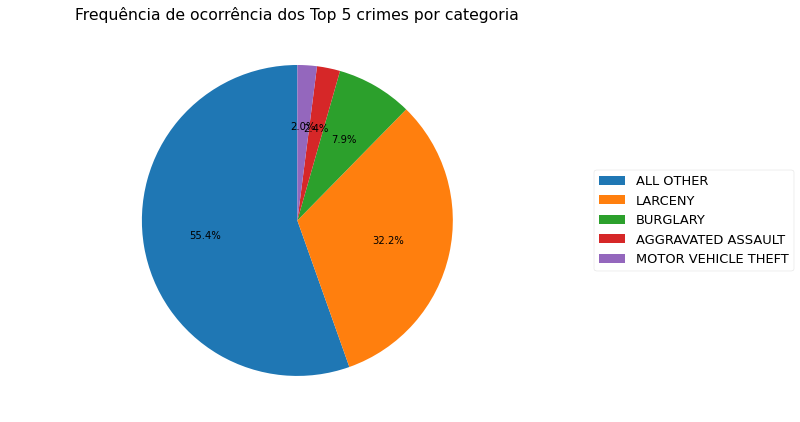

In [16]:
# Gráfico de Pizza 1
fatias, texto, autotextos = plt.pie(df.Crime_Category.value_counts().head(5), autopct='%1.1f%%',startangle = 90)
plt.axes().set_aspect('equal', 'datalim')
plt.legend(fatias, labels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Frequência de ocorrência dos Top 5 crimes por categoria")
plt.show()

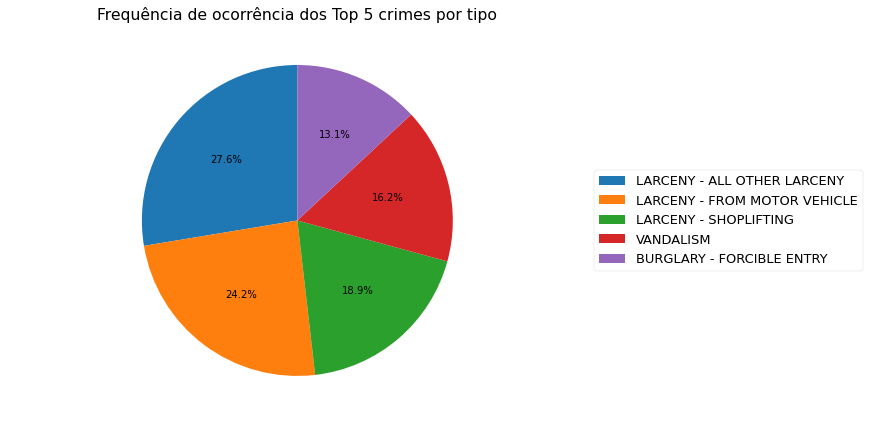

In [17]:
#Criando gráfico de Pizza das Tipos de Crime
# Definindo a quantidade 2
labels1 = df.Crime_Type.value_counts().index
num1 = len(df.Crime_Type.value_counts().index)

# Gráfico de Pizza 2
fatias1, texto1, autotextos1 = plt.pie(df.Crime_Type.value_counts().head(5), autopct='%1.1f%%',startangle = 90)
plt.axes().set_aspect('equal', 'datalim')
plt.legend(fatias1, labels1,  loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Frequência de ocorrência dos Top 5 crimes por tipo")
plt.show()

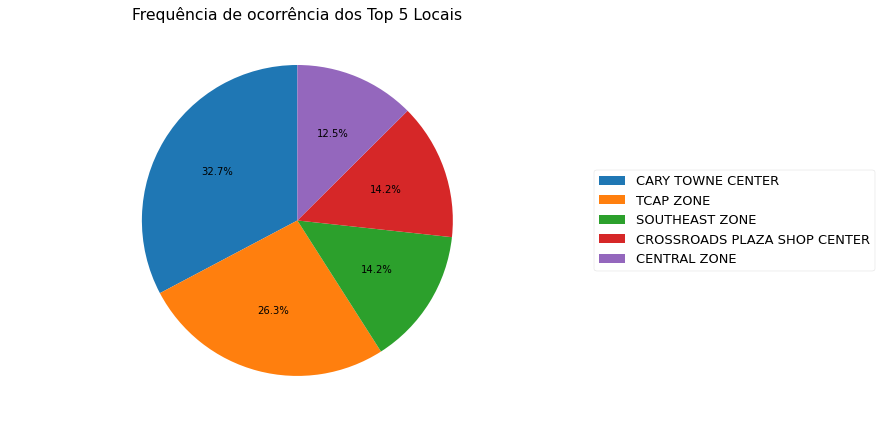

In [18]:
#Criando gráfico de Pizza das Divisões Residenciais
# Definindo a quantidade 3
labels2 = df.Residential_Subdivision.value_counts().index
num2 = len(df.Residential_Subdivision.value_counts().index)

# Gráfico de Pizza 3
fatias2, texto2, autotextos2 = plt.pie(df.Residential_Subdivision.value_counts().head(5), autopct='%1.1f%%',startangle = 90)
plt.axes().set_aspect('equal', 'datalim')
plt.legend(fatias2, labels2,  loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Frequência de ocorrência dos Top 5 Locais")
plt.show()

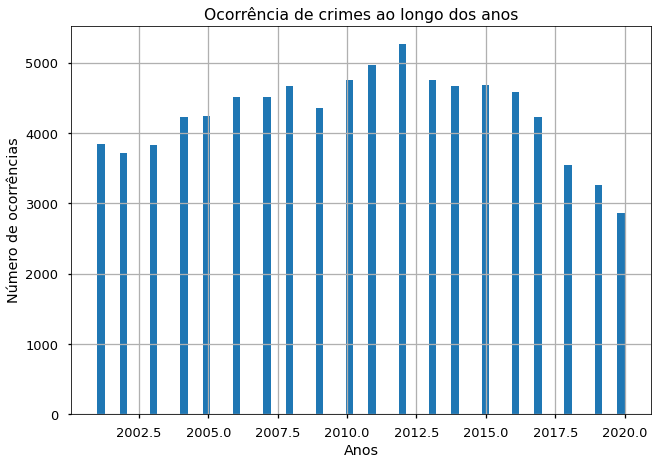

In [19]:
#Histograma de ocorrências ao longo dos anos
y = len(df.year.value_counts().index)
df.year.hist(bins = 70)
plt.xlabel("Anos")
plt.ylabel("Número de ocorrências")
plt.title("Ocorrência de crimes ao longo dos anos")
plt.show()

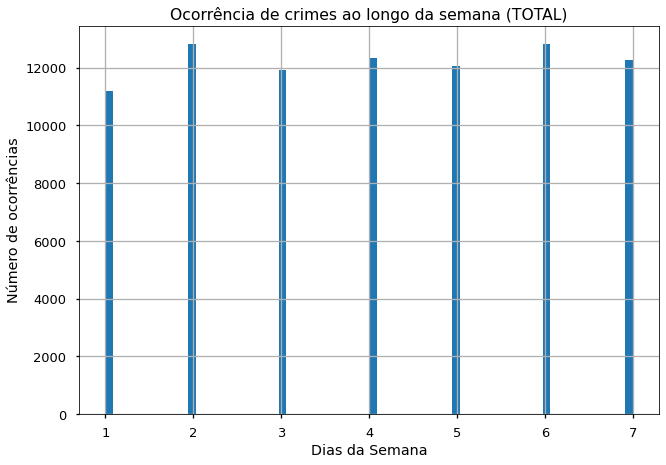

In [20]:
#Histograma de ocorrências ao longo dos dias da semana
y1 = len(df.Week_Day.value_counts().index)
df.Week_Day.hist(bins = 70)
plt.xlabel("Dias da Semana")
plt.ylabel("Número de ocorrências")
plt.title("Ocorrência de crimes ao longo da semana (TOTAL)")
plt.show()

### Etapa 2 - Segmentação
O objetivo é criar um dataset com as Subdivisões Residenciais como index e traçar o nivel de segurança de cada uma das localidades

In [21]:
#Criando um dataframe separado para manipulações
total_crimes = df['Residential_Subdivision'].value_counts()
df_class = pd.DataFrame(total_crimes)

In [22]:
#Verificando a tabela criada
print(df_class.head())

                              Residential_Subdivision
CARY TOWNE CENTER                                4606
TCAP ZONE                                        3699
SOUTHEAST ZONE                                   2004
CROSSROADS PLAZA SHOP CENTER                     1994
CENTRAL ZONE                                     1764


In [23]:
#Adicionando colunas para os crimes
#As variáveis criadas contarão por subdivisão quando o crime delimitado ocorre
crime1 = df.groupby('Residential_Subdivision').Crime_Type.value_counts().unstack(fill_value=0).loc[:,'LARCENY - ALL OTHER LARCENY']
crime2 = df.groupby('Residential_Subdivision').Crime_Type.value_counts().unstack(fill_value=0).loc[:,'LARCENY - FROM MOTOR VEHICLE']
crime3 = df.groupby('Residential_Subdivision').Crime_Type.value_counts().unstack(fill_value=0).loc[:,'LARCENY - SHOPLIFTING']
crime4 = df.groupby('Residential_Subdivision').Crime_Type.value_counts().unstack(fill_value=0).loc[:,'VANDALISM']
crime5 = df.groupby('Residential_Subdivision').Crime_Type.value_counts().unstack(fill_value=0).loc[:,'BURGLARY - FORCIBLE ENTRY']
crime6 = df.groupby('Residential_Subdivision').Crime_Type.value_counts().unstack(fill_value=0).loc[:,'SIMPLE PHYSICAL ASSAULT']
crime7 = df.groupby('Residential_Subdivision').Crime_Type.value_counts().unstack(fill_value=0).loc[:,'VANDALISM - DAMAGE TO PROPERTY']
crime8 = df.groupby('Residential_Subdivision').Crime_Type.value_counts().unstack(fill_value=0).loc[:,'FRAUD - CREDIT CARD/ATM']
crime9 = df.groupby('Residential_Subdivision').Crime_Type.value_counts().unstack(fill_value=0).loc[:,'FRAUD - ALL OTHER']
crime10 = df.groupby('Residential_Subdivision').Crime_Type.value_counts().unstack(fill_value=0).loc[:,'ASSAULT - SIMPLE - ALL OTHER']

In [24]:
#Criando lista para as variáveis criadas
crimes = [crime1,crime2,crime3,crime4,crime5,crime6,crime7,crime8,crime9,crime10]

#Adicionando colunas com os valores das variáveis criadas
for x in crimes:
    df_class = pd.concat([df_class, x], axis=1)

In [25]:
#Excluindo a colunas de divisão devido ela ser o index do dataframe
df_crimes = df_class.drop(['Residential_Subdivision'], axis=1)

#Somando as colunas criadas e as deletando
df_class['top_crimes'] = df_crimes.sum(axis=1)

colum = ['LARCENY - ALL OTHER LARCENY','LARCENY - FROM MOTOR VEHICLE','LARCENY - SHOPLIFTING','VANDALISM','BURGLARY - FORCIBLE ENTRY',
         'SIMPLE PHYSICAL ASSAULT','VANDALISM - DAMAGE TO PROPERTY','FRAUD - CREDIT CARD/ATM','FRAUD - ALL OTHER','ASSAULT - SIMPLE - ALL OTHER']

for x in colum:
    df_class = df_class.drop(columns=[x])

In [26]:
#Verificando o resultado
print(df_class.head())

                              Residential_Subdivision  top_crimes
CARY TOWNE CENTER                                4606        3363
TCAP ZONE                                        3699        1644
SOUTHEAST ZONE                                   2004         948
CROSSROADS PLAZA SHOP CENTER                     1994        1358
CENTRAL ZONE                                     1764         732


In [27]:
#Adicionando colunas para os anos para realizar comparações
anos = [2001,2010,2019]
years = []
for x in anos:
    ano = df.groupby('Residential_Subdivision').year.value_counts().unstack(fill_value=0).loc[:,x]
    years.append(ano)

for x in years:
    df_class = pd.concat([df_class, x], axis=1)

In [28]:
#Adicionando as variações de ocorrências entre anos

#Criando as colunas de variações
var_01_19 = (df_class[2019].div(df_class[2001]))-1
var_01_10 = (df_class[2010].div(df_class[2001]))-1
var_10_19 = (df_class[2019].div(df_class[2010]))-1

#Juntando e adicionando os nomes
vars = pd.concat([var_01_19, var_01_10], axis=1)
vars = vars.rename(columns={0:'var_01_19'})
vars = vars.rename(columns={1:'var_01_10'})
vars = pd.concat([vars, var_10_19], axis=1)
vars = vars.rename(columns={0:'var_10_19'})

#Adicionando no dataframe
df_class = pd.concat([df_class,vars],axis=1)

#Adicionando zeros
df_class = df_class.fillna(0)
print(df_class)

                               Residential_Subdivision  top_crimes  2001  \
CARY TOWNE CENTER                                 4606        3363   287   
TCAP ZONE                                         3699        1644   183   
SOUTHEAST ZONE                                    2004         948   128   
CROSSROADS PLAZA SHOP CENTER                      1994        1358    98   
CENTRAL ZONE                                      1764         732    96   
...                                                ...         ...   ...   
ESTATES AT YOUNG LANDING, THE                        1           1     0   
BAINBRIDGE PLACE TOWNHOMES                           1           1     0   
SHERWOOD AT REGENCY                                  1           1     0   
VILLAGIO                                             1           0     0   
PINEY PLAINS CHRISTIAN CHURCH                        1           1     0   

                               2010  2019  var_01_19  var_01_10  var_10_19  
CARY TOWNE

In [29]:
#Renomeando colunas
df_class = df_class.rename(columns={'Residential_Subdivision':'Total_Crimes'})
df_class = df_class.rename(columns={'top_crimes':'%Top10_Crimes'})
print(df_class)

                               Total_Crimes  %Top10_Crimes  2001  2010  2019  \
CARY TOWNE CENTER                      4606           3363   287   215   165   
TCAP ZONE                              3699           1644   183   209    45   
SOUTHEAST ZONE                         2004            948   128    63   100   
CROSSROADS PLAZA SHOP CENTER           1994           1358    98    91    88   
CENTRAL ZONE                           1764            732    96    81    96   
...                                     ...            ...   ...   ...   ...   
ESTATES AT YOUNG LANDING, THE             1              1     0     0     0   
BAINBRIDGE PLACE TOWNHOMES                1              1     0     0     0   
SHERWOOD AT REGENCY                       1              1     0     0     0   
VILLAGIO                                  1              0     0     0     0   
PINEY PLAINS CHRISTIAN CHURCH             1              1     0     0     0   

                               var_01_1

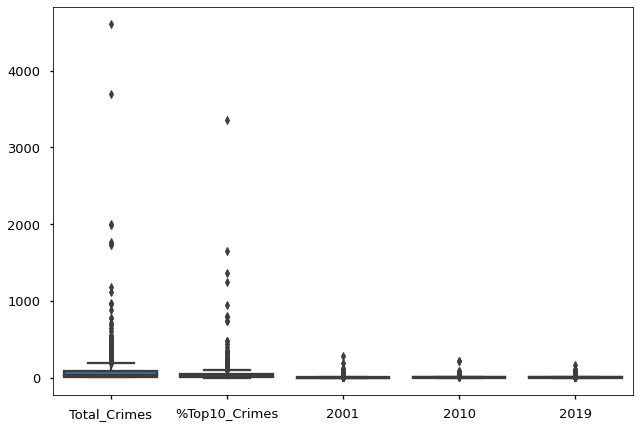

In [31]:
#Verificando a disperção dos dados
df_box = df_class.drop(['var_01_19','var_01_10','var_10_19'],axis=1)
sb.boxplot(data=df_box)
plt.show()
#Muitos outliers causam o achatamento do boxplot

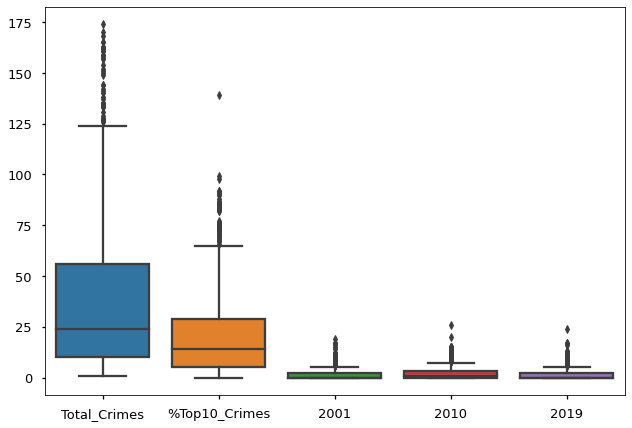

In [32]:
#Eliminando outliers para melhor visualização
df_box = df_box[df_box.Total_Crimes < 176]
sb.boxplot(data=df_box)
plt.show()

#### Criando indicador de segurança

In [36]:
#Criando função para classificação de nível de segurança das divisões residenciais
def nivel_seg(row):
    if row['Total_Crimes'] < 55 and row['var_10_19'] > row['var_01_10']:
        return 1 #Segurança Alta'
    if row['Total_Crimes'] < 55 and row['var_10_19'] < row['var_01_10']:
        return 2 #'Segurança Média'
    if row['Total_Crimes'] > 55 and row['var_10_19'] > row['var_01_10']:
        return 3 #'Segurança Baixa'
    if row['Total_Crimes'] > 55 and row['var_10_19'] < row['var_01_10']:
        return 4 #'Inseguro'
    else:
        return 0 # 'Neutro'

In [37]:
#Aplicando a função
df_class['Ind_Segurança'] = df_class.apply(nivel_seg, axis=1)

#Verificando a distribuição das categorias
print(df_class['Ind_Segurança'].value_counts())

2    274
4    235
0    179
1    147
3     74
Name: Ind_Segurança, dtype: int64


In [45]:
#Verificando valores infinitos
df_class = df_class.replace([np.inf, -np.inf], 0)

In [46]:
#Transformando Index em Coluna de Subdivisão Residencial e resetando o index
df_class = df_class.reset_index()
df_class = df_class.rename(columns={'index':'Residential_Subdivision'})
print(df_class)

    Residential_Subdivision        Residential_Subdivision  Total_Crimes  \
0                         0              CARY TOWNE CENTER          4606   
1                         1                      TCAP ZONE          3699   
2                         2                 SOUTHEAST ZONE          2004   
3                         3   CROSSROADS PLAZA SHOP CENTER          1994   
4                         4                   CENTRAL ZONE          1764   
..                      ...                            ...           ...   
904                     904  ESTATES AT YOUNG LANDING, THE             1   
905                     905     BAINBRIDGE PLACE TOWNHOMES             1   
906                     906            SHERWOOD AT REGENCY             1   
907                     907                       VILLAGIO             1   
908                     908  PINEY PLAINS CHRISTIAN CHURCH             1   

     %Top10_Crimes  2001  2010  2019  var_01_19  var_01_10  var_10_19  \
0             

### Parte 3 - Algoritmo de Classificação

Parte 3.1 - Algoritmo Random Forest

In [40]:
#Importando os pacotes a serem usados
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [47]:
#Criando elementos de feature e de target
df_feature = df_class.drop(['Residential_Subdivision',2001,2010,2019,'Ind_Segurança'],axis=1)
df_target = df_class['Ind_Segurança']

In [48]:
#Criando o Modelo de Classificação usando Random Forest
clf = RandomForestClassifier()
clf.fit(df_feature,df_target)

RandomForestClassifier()

In [49]:
#Importância de cada feature
print('Importância de cada Featured')
print(clf.feature_importances_)

Importância de cada Featured
[0.33529755 0.2130934  0.05281601 0.1182379  0.28055514]


In [50]:
#Fazendo predição
print(clf.predict(df_feature[0:9]))
print(clf.predict_proba(df_feature[0:9]))

[3 4 3 3 3 3 3 4 3]
[[0.   0.   0.   0.69 0.31]
 [0.   0.   0.   0.09 0.91]
 [0.   0.   0.   0.99 0.01]
 [0.   0.   0.   0.96 0.04]
 [0.   0.   0.   0.96 0.04]
 [0.   0.   0.   0.98 0.02]
 [0.   0.   0.   0.98 0.02]
 [0.   0.   0.   0.09 0.91]
 [0.   0.   0.   0.99 0.01]]


In [51]:
#Dividindo o dataset (80/20)
feature_train, feature_test, target_train, target_test = train_test_split(df_feature,df_target, test_size=0.2)

In [52]:
#Reconstruindo Random Forest
clf.fit(feature_train,target_train)

RandomForestClassifier()

In [53]:
#Fazendo predição
print('Predições do datatest')
print(clf.predict(feature_test[0:2]))
print(target_test[0:2])

print('Acurácia do Random Forest')
print(clf.score(feature_test,target_test))
Para um primeiro modelo - 80% de acurácia é considerado excelente

Predições do datatest
[4 1]
82     4
463    1
Name: Ind_Segurança, dtype: int64
Acurácia do Random Forest
0.8131868131868132


Para um primeiro modelo - 80% de acurácia é considerado excelente

Parte 3.2 - Algoritmo Support Vector Machine (SVM)

In [56]:
#Importando os pacotes
from sklearn.svm import SVC

In [57]:
#Criando o modelo
cls = SVC()
cls.fit(feature_train,target_train)

SVC()

In [58]:
#Verificando a acurácia do modelo
print('Acurácia do SVM')
print(cls.score(feature_test,target_test))

Acurácia do SVM
0.521978021978022


Parte 3.3 - Algoritmo K-Nearest Neighbours

In [55]:
#Importando os pacotes
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [59]:
#Transformando os dados para caberem no modelo
sc_feature = StandardScaler()
feature_train = sc_feature.fit_transform(feature_train)
feature_test = sc_feature.transform(feature_test)

In [60]:
#Estipulando o valor de K
import math
print('Raiz Quadrada de datatest para estipular o valor de k')
print(math.sqrt(len(target_test)))

Raiz Quadrada de datatest para estipular o valor de k
13.490737563232042


In [61]:
#Criando o modelo inicial
clk = KNeighborsClassifier(n_neighbors=13, p=2,metric="euclidean")
clk.fit(feature_train,target_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=13)

In [62]:
#Realizando as predições
feature_pred = clk.predict((feature_test))

In [63]:
#Verificando a matrix de confusão (Mostra o número de acertos e falsos acertos)
cm = confusion_matrix(target_test, feature_pred)
print(cm)

[[28  8  1  0  0]
 [16 17  2  1  0]
 [ 4  2 39  0  4]
 [ 0  1  2  5  2]
 [ 1  0  9  2 38]]


In [64]:
print('Acurácia do K-Neighbours')
print(clk.score(feature_test,target_test))

Acurácia do K-Neighbours
0.6978021978021978


## Fim
Conseguimos verificar que o melhor modelo para o exemplo proposto foi o Random Forest com 
precisão de 81%.
